### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from skimage import io, filters, color, transform
from os import listdir

image_files = listdir('LOGOS/')

### Loading Image Files

In [2]:
bw_image_files = filter(lambda x: x.find('bw') != -1, image_files)
bw_image_data = map(lambda x: io.imread('LOGOS/'+x), bw_image_files)
bw_channel = map(lambda x: x.split('-')[0].lower(), bw_image_files)
image_df = pd.DataFrame({'image': bw_image_data, 'channel': bw_channel, 'filename':bw_image_files})

TypeError: object of type 'map' has no len()

In [309]:
image_df.shape

(47, 3)

### Thresholding

In [212]:
dummy_img = io.imread('LOGOS/Rishtey-7-2.jpg')
dummy_img2 = io.imread('LOGOS/Rishtey-7-2.jpg.bw.png')

/Users/sanad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


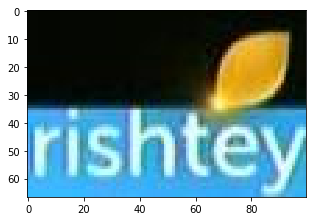

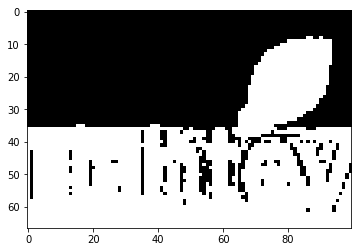

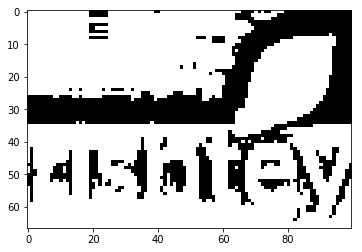

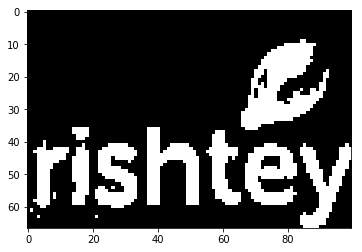

In [231]:
dummy_img3 =  color.rgb2gray(dummy_img) > filters.threshold_sauvola(color.rgb2gray(dummy_img))
dummy_img4 =  color.rgb2gray(dummy_img) > filters.threshold_yen(color.rgb2gray(dummy_img))
fig = plt.figure(figsize=(5,5))
plt.imshow(dummy_img)
plt.show()
plt.imshow(dummy_img2, cmap=plt.cm.gray)
plt.show()
plt.imshow(dummy_img3, cmap=plt.cm.gray)
plt.show()
plt.imshow(dummy_img4, cmap=plt.cm.gray)
plt.show()

In [307]:
image_df.head()

,channel,filename,image
0,india,India-TV-55.jpg.bw.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,aastha,Aastha-85.jpg.bw.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,dd,DD-News-11.jpg.bw.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,rishtey,Rishtey-7-0.jpg.bw.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,zee,Zee-News-70.jpg.bw.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Resizing Images to 60x60

In [179]:
image_df.image[6].shape

(67, 100)

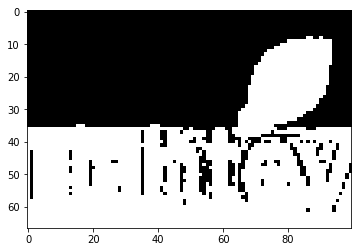

In [181]:
plt.imshow(image_df.image[6], cmap=plt.cm.gray)
plt.show()

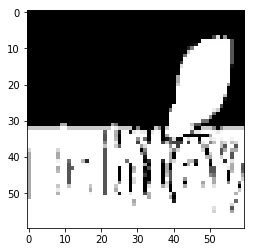

In [190]:
plt.imshow(transform.resize(image_df.image[6], (60,60)), cmap=plt.cm.gray)
plt.show()

### Data preprocessing: Resizing Image, Label Encoding Channel, Image Feature Extraction

In [310]:
#resizing all images of dataset to 60x60 size
image_df.image = image_df.image.apply(lambda x: transform.resize(x, (60,60)))

In [311]:
#label_encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
image_df.channel = le.fit_transform(image_df.channel)

In [313]:
#extract features
temp = image_df.image.apply(lambda x: x.flatten())
image_df = pd.concat([image_df, pd.DataFrame(temp.values.tolist())], axis=1)

In [315]:
image_df.head(10)

,channel,filename,image,0,1,2,3,4,5,6,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,2,India-TV-55.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Aastha-85.jpg.bw.png,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.0,0.960417,0.01875,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,DD-News-11.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Rishtey-7-0.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,Zee-News-70.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Aastha-77.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0,Aastha-88.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,3,Rishtey-0.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,3,Rishtey-7-5.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,2,India-TV-50.jpg.bw.png,"[[0.0, 0.0, 0.0, 0.0786805555555, 0.8583333333...",0.0,0.0,0.0,0.078681,0.858333,0.858333,0.858333,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
from sklearn.model_selection import train_test_split

y = image_df.channel
X = image_df.drop(['filename', 'channel', 'image'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4)

In [317]:
print xtrain.shape, ytrain.shape
print xtest.shape, ytest.shape

(28, 3600) (28,)
(19, 3600) (19,)


### Linear SVC model

In [318]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model = model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [321]:
pred == ytest

17    True
31    True
33    True
45    True
46    True
12    True
26    True
0     True
37    True
38    True
40    True
24    True
3     True
13    True
15    True
5     True
19    True
42    True
14    True
Name: channel, dtype: bool